In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL

In [2]:
datasetPath = "/Users/aman/Documents/Work/Machine Learning/Rock-Paper-Scissors-Using-ML/Dataset"

In [3]:
imgSize = (128, 128)
batchSize = 32

In [4]:
# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    validation_split=0.2,   # Split into training and validation
    rotation_range=20,      # Data augmentation: rotate images
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True    # Random horizontal flip
)

In [5]:
# Training dataset
train = datagen.flow_from_directory(
    datasetPath + "/train",
    target_size=imgSize,
    batch_size=batchSize,
    class_mode='categorical',  # For multi-class classification
    subset='training'
)

Found 2043 images belonging to 3 classes.


In [6]:
# Validation dataset
val = datagen.flow_from_directory(
    datasetPath + "/train",
    target_size=imgSize,
    batch_size=batchSize,
    class_mode='categorical',
    subset='validation'
)

Found 510 images belonging to 3 classes.


In [7]:
# Test dataset
test = datagen.flow_from_directory(
    datasetPath + "/test",
    target_size=imgSize,
    batch_size=batchSize,
    class_mode='categorical',
    subset='validation'
)

Found 72 images belonging to 3 classes.


In [8]:
def visualizeSamples(generator):
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Plot a few samples
    plt.figure(figsize=(6, 4))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Display image
        plt.title(f"Class: {np.argmax(labels[i])}")  # Show class index
        plt.axis('off')
    plt.tight_layout()
    plt.show()

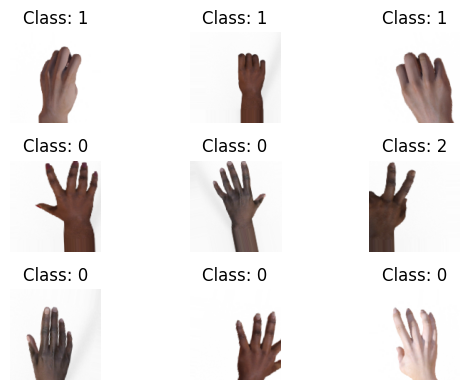

In [9]:
visualizeSamples(train)

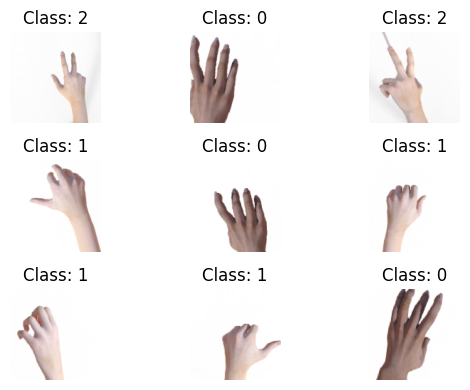

In [10]:
visualizeSamples(val)

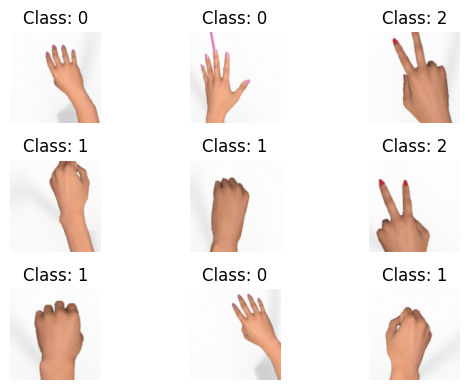

In [11]:
visualizeSamples(test)

In [12]:
# Check image count per class
for folder in os.listdir(datasetPath + "/train"):
    folderPath = os.path.join(datasetPath + "/train", folder)
    if os.path.isdir(folderPath):
        print(f"{folder}: {len(os.listdir(folderPath))} images")

paper: 851 images
rock: 851 images
scissors: 851 images
